<a href="https://colab.research.google.com/github/Pratiksha-1602/Cervical-Cancer/blob/main/Cervical_CancerNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOR CERVICAL CANCER PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings("ignore")

READING THE DATASET

In [2]:
df = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")


PREPROCESSING THE DATA

In [3]:
df=df.drop(['STDs: Time since first diagnosis'], axis = 1)
df = df.drop(['STDs: Time since last diagnosis'], axis = 1)
df = df.replace('?', np.nan)
df=df.drop_duplicates()
df = df.apply(pd.to_numeric, errors='coerce')

In [4]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0)
df['IUD (years)'] = df['IUD (years)'].fillna(0)
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())

DEFINING THE INPUT AND OUTPUT COLUMNS

In [5]:
y = df["Biopsy"]
X = df.drop(["Biopsy"], axis = 1)

SPLITTING THE DATASET INTO TEST AND TRAINING

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

PERFORMING NORMALIZATION

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

DECISION TREE CLASSIFIER

In [8]:
cc_decisionclassifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2)
cc_decisionclassifier.fit(X_train, y_train)
joblib.dump(cc_decisionclassifier, "/content/cc_decisionclassifier")

['/content/cc_decisionclassifier']

In [9]:
y_pred = cc_decisionclassifier.predict(X_test)
print("Decision Tree Classifier Report")
print(classification_report(y_test, y_pred))

Decision Tree Classifier Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       193
           1       0.78      0.88      0.82        16

    accuracy                           0.97       209
   macro avg       0.88      0.93      0.90       209
weighted avg       0.97      0.97      0.97       209



SVM MODEL

In [10]:
from sklearn.svm import SVC
cc_svm_model = SVC(kernel='poly', C=1.0, gamma='scale', random_state=42)
cc_svm_model.fit(X_train, y_train)
joblib.dump(cc_svm_model,"/content/cc_svm_model")
y_pred = cc_svm_model.predict(X_test)
print("SVM Model Report")
print(classification_report(y_test, y_pred))

SVM Model Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       193
           1       0.60      0.56      0.58        16

    accuracy                           0.94       209
   macro avg       0.78      0.77      0.77       209
weighted avg       0.94      0.94      0.94       209



RANDOM FOREST

In [11]:
from sklearn.ensemble import RandomForestClassifier
cc_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cc_rf_model.fit(X_train, y_train)
joblib.dump(cc_rf_model, "/content/cc_rf_model")
y_pred_rf = cc_rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       193
           1       0.71      0.62      0.67        16

    accuracy                           0.95       209
   macro avg       0.84      0.80      0.82       209
weighted avg       0.95      0.95      0.95       209



KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
cc_knn_model = KNeighborsClassifier(n_neighbors=5)
cc_knn_model.fit(X_train, y_train)
joblib.dump(cc_knn_model, "/content/cc_knn_model")
y_pred_knn = cc_knn_model.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       193
           1       0.64      0.44      0.52        16

    accuracy                           0.94       209
   macro avg       0.80      0.71      0.74       209
weighted avg       0.93      0.94      0.93       209



ADA BOOST

In [13]:
from sklearn.ensemble import AdaBoostClassifier
base_learner = DecisionTreeClassifier(max_depth=500)
adaboost_model = AdaBoostClassifier(base_learner, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
joblib.dump(adaboost_model, "/content/cc_adaboost_model")
y_pred_adaboost = adaboost_model.predict(X_test)
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       193
           1       0.73      0.50      0.59        16

    accuracy                           0.95       209
   macro avg       0.84      0.74      0.78       209
weighted avg       0.94      0.95      0.94       209



VOTING CLASSIFIER

In [14]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[
    ('decision_tree',cc_decisionclassifier),
    ('svm', cc_svm_model),
    ('random_forest', cc_rf_model ),
    ('adaboost',adaboost_model )
], voting='hard')
voting_model.fit(X_train, y_train)
joblib.dump(voting_model, "/content/cc_voting_model")
y_pred_voting = voting_model.predict(X_test)
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))


Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       193
           1       0.69      0.56      0.62        16

    accuracy                           0.95       209
   macro avg       0.83      0.77      0.80       209
weighted avg       0.94      0.95      0.94       209



BAGGING CLASSIFER

In [15]:
from sklearn.ensemble import BaggingClassifier
base_decision_tree = DecisionTreeClassifier(max_depth=500)
bagging_model = BaggingClassifier(base_estimator=base_decision_tree,  # Pass the instantiated base estimator
                                  n_estimators=10,
                                  random_state=42)
bagging_model.fit(X_train, y_train)
joblib.dump(bagging_model, "/content/cc_bagging_model")
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred_bagging))

Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       193
           1       0.80      0.75      0.77        16

    accuracy                           0.97       209
   macro avg       0.89      0.87      0.88       209
weighted avg       0.97      0.97      0.97       209



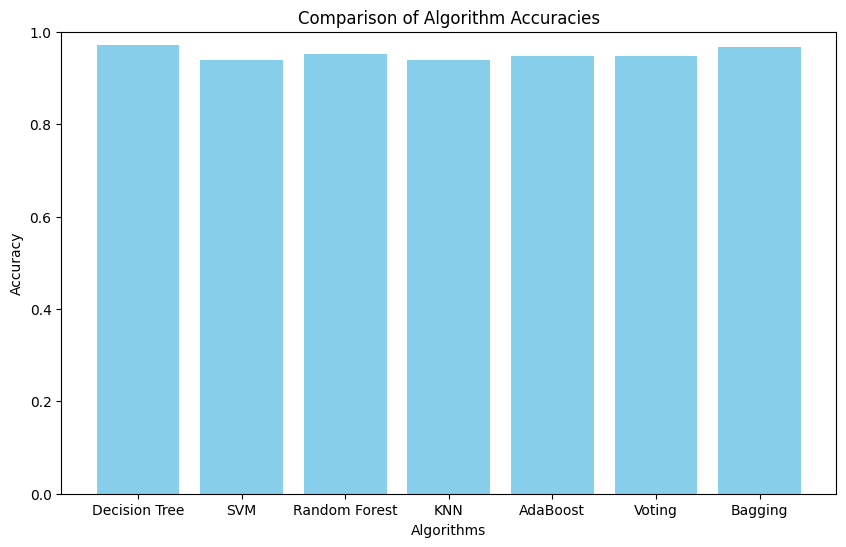

In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate accuracy of each model
accuracy_decision_tree = accuracy_score(y_test, cc_decisionclassifier.predict(X_test))
accuracy_svm = accuracy_score(y_test, cc_svm_model.predict(X_test))
accuracy_random_forest = accuracy_score(y_test, cc_rf_model.predict(X_test))
accuracy_knn = accuracy_score(y_test, cc_knn_model.predict(X_test))
accuracy_adaboost = accuracy_score(y_test, adaboost_model.predict(X_test))
accuracy_voting = accuracy_score(y_test, voting_model.predict(X_test))
accuracy_bagging = accuracy_score(y_test, bagging_model.predict(X_test))

# Store accuracies in a list
accuracies = [accuracy_decision_tree, accuracy_svm, accuracy_random_forest, accuracy_knn, accuracy_adaboost, accuracy_voting, accuracy_bagging]
models = ["Decision Tree", "SVM", "Random Forest", "KNN", "AdaBoost", "Voting", "Bagging"]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim([0, 1])
plt.show()


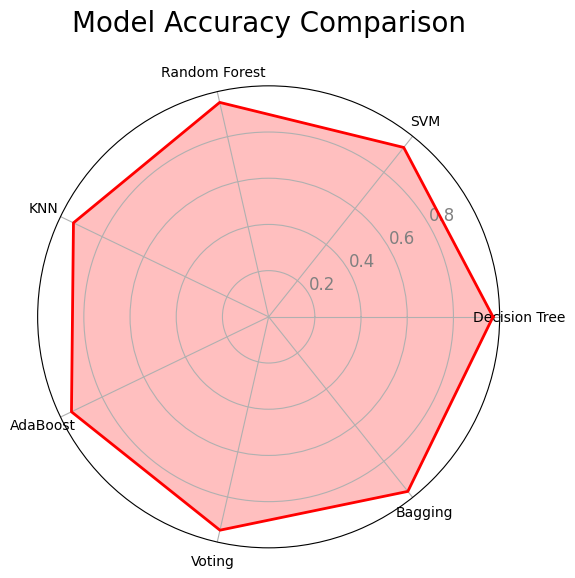

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of variables
num_vars = len(models)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop"
values = accuracies + accuracies[:1]
angles += angles[:1]

# Initialize the spider plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per model and add labels
plt.xticks(angles[:-1], models)

# Draw ylabels
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=12)
plt.ylim(0, 1)

# Plot data
ax.plot(angles, values, color='red', linewidth=2, linestyle='solid')

# Fill area
ax.fill(angles, values, color='red', alpha=0.25)

plt.title('Model Accuracy Comparison', size=20, color='black', y=1.1)
plt.show()


In [18]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracy_decision_tree = accuracy_score(y_test, cc_decisionclassifier.predict(X_test))
accuracy_svm = accuracy_score(y_test, cc_svm_model.predict(X_test))
accuracy_random_forest = accuracy_score(y_test, cc_rf_model.predict(X_test))
accuracy_knn = accuracy_score(y_test, cc_knn_model.predict(X_test))
accuracy_adaboost = accuracy_score(y_test, adaboost_model.predict(X_test))
accuracy_voting = accuracy_score(y_test, voting_model.predict(X_test))
accuracy_bagging = accuracy_score(y_test, bagging_model.predict(X_test))

# Create a dictionary of the models and their accuracies
accuracies = {
    'Decision Tree': accuracy_decision_tree,
    'SVM': accuracy_svm,
    'Random Forest': accuracy_random_forest,
    'KNN': accuracy_knn,
    'AdaBoost': accuracy_adaboost,
    'Voting': accuracy_voting,
    'Bagging': accuracy_bagging
}


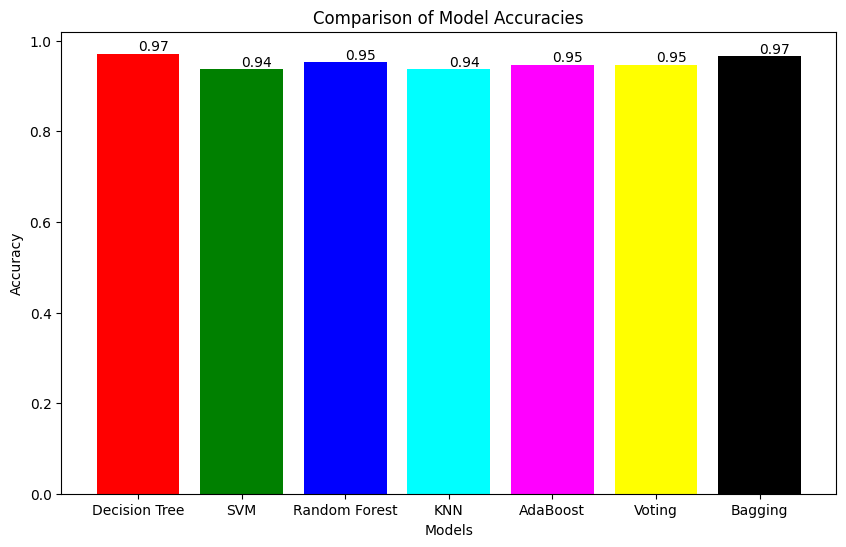

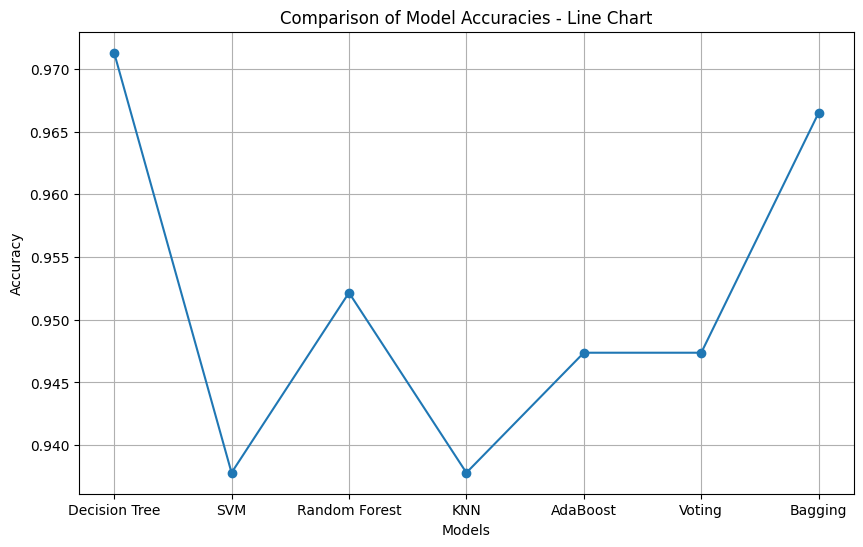

In [19]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment
plt.show()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies - Line Chart')
plt.grid(True)
plt.show()


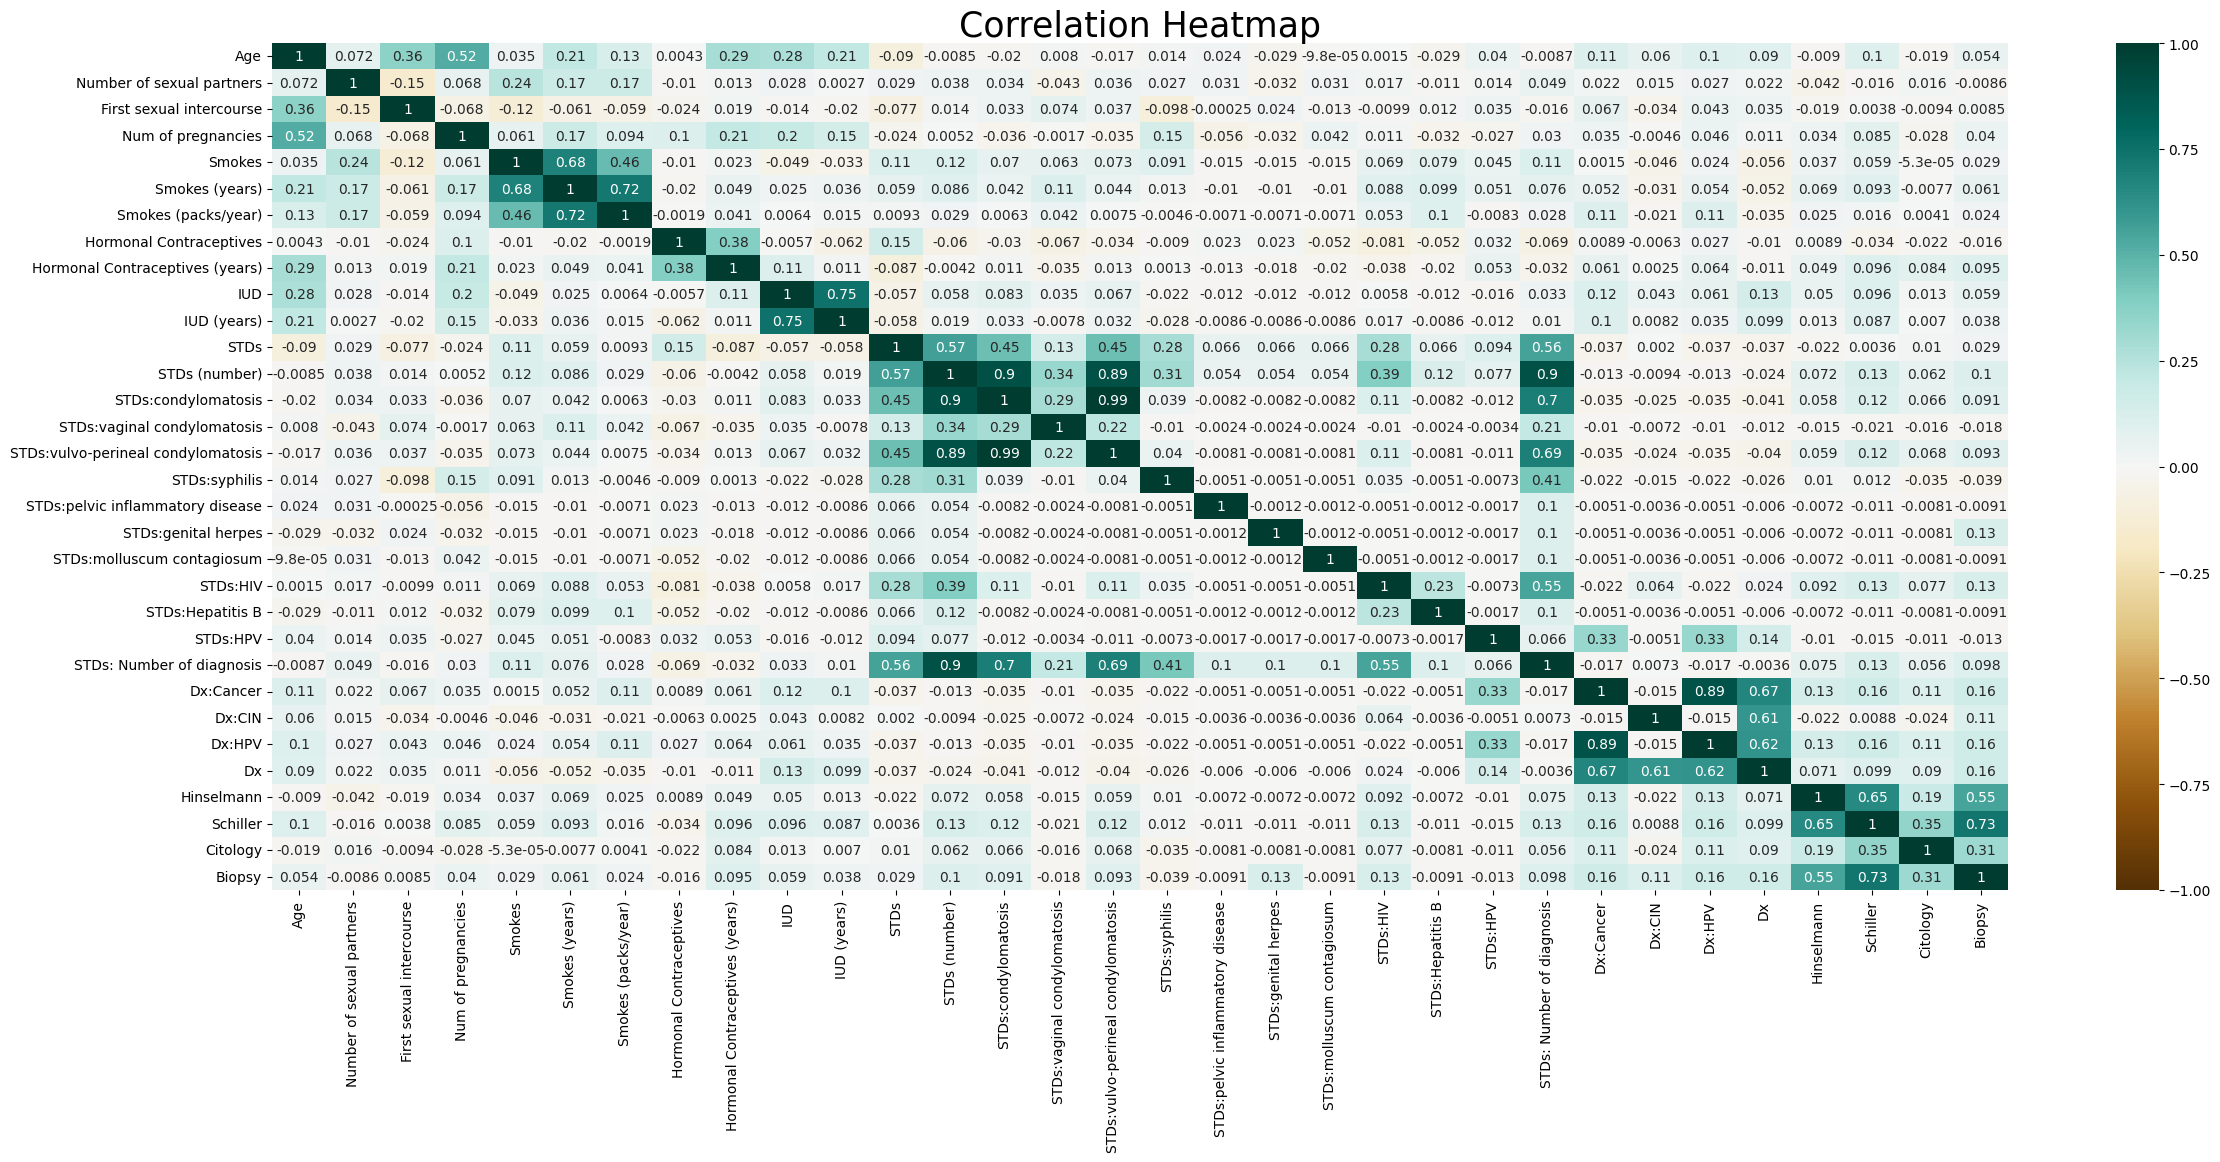

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop columns '15' and '22' from the DataFrame
df_filtered = df.drop(columns=['STDs:cervical condylomatosis', 'STDs:AIDS'])

plt.figure(figsize=(28, 11))
heatmap = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=5)
plt.show()
plt.savefig('heatmap.png', dpi=1300, bbox_inches='tight')

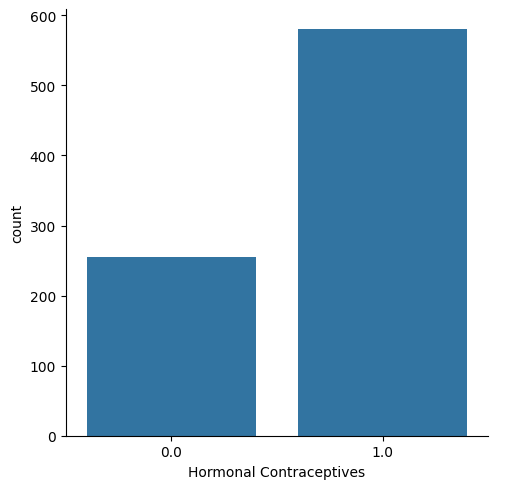

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Hormonal Contraceptives' is a column in your DataFrame 'df_filtered'
sns.catplot(x='Hormonal Contraceptives', data=df_filtered, kind='count')
plt.show()


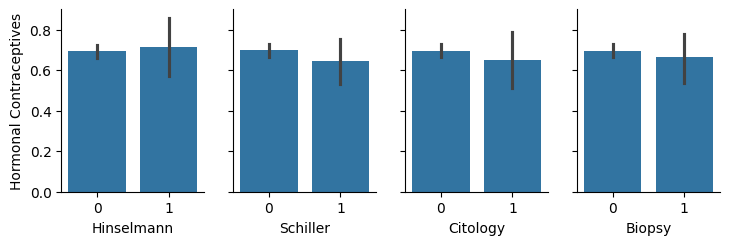

In [22]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']
g = sns.PairGrid(df_filtered,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars= category_df,
                 aspect=.75)
g.map(sns.barplot, palette="pastel");